In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
# hyperbolic function based on the paper
def hyperbolic_fit(T, r0, a, b, T0, c):
    H0 = 0.5 * ((T - T0) + np.sqrt((T - T0)**2 + 4 * np.exp(c)))
    return r0 - a * (T - T0) - b * H0

def read_xvg(file_path):
    time = []
    temp = []
    dens = []
    
    with open('tg.xvg', 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('#') and not line.startswith('@'):
                time.append(float(line.split()[0]))
                temp.append(float(line.split()[1]))
                dens.append(float(line.split()[2]))
                
    time = np.array(time)
    temp = np.array(temp)
    dens = np.array(dens)
 
    return time, temp, dens

time, temp, dens = read_xvg('tg.xvg')
time_ns = time/1000

In [9]:
# loop
time_ns = time/1000

start_time = 0.0
interval = 2.0
skip = 3.0

if time_ns[0] == 0.0:
    start_time = time_ns[3]

averaged_data = []

while start_time < time_ns[-1]:
    interval_start = start_time
    interval_end = start_time + interval

    indices = (time_ns >= interval_start) & (time_ns < interval_end)
    avg_temp_interval = np.mean(temp[indices])
    avg_dens_interval = np.mean(dens[indices])
    std_dens_interval = np.std(dens[indices])

    averaged_data.append([avg_temp_interval, avg_dens_interval, std_dens_interval])

    start_time += skip

In [11]:
# tg calculation
def calculate_tg_from_xvg(file_path):
    time, temp, dens = read_xvg('file_path')

calculate_tg_from_xvg('tg.xvg')

averaged_data = np.array(averaged_data)
temp_range = np.arange(1200, 100, -20)
avg_temp = averaged_data[:, 0]  
avg_dens = averaged_data[:, 1] 
std_dens = averaged_data[:, 2]  

In [21]:
# initial guesses
initial_guess = [1000, 0.5, 10, 400, 0] 
bounds = ([1000, 0, 0, 100, -10], [1300, 10, 100, 800, 10])

#hyperbolic curve
popt, pcov = curve_fit(hyperbolic_fit, avg_temp, avg_dens, p0=initial_guess, bounds=bounds, maxfev=10000)

r0, a, b, T0, c = popt

p_fit = hyperbolic_fit(avg_temp, *popt)

# error from covariance  
errors = np.sqrt(np.diag(pcov))

# fitted tg and error
T0 = popt[3] 
T0_error = errors[3] 

# r^2
r_squared = r2_score(avg_dens, p_fit)

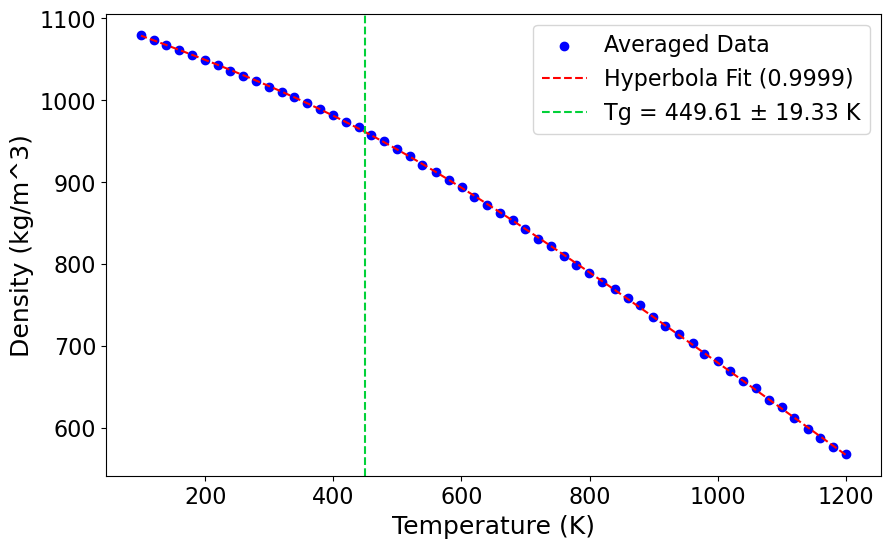

In [35]:
# plot graph
plt.figure(figsize=(10, 6))
plt.scatter(avg_temp, avg_dens, label='Averaged Data', color='blue')
plt.plot(avg_temp, p_fit, label=f'Hyperbola Fit ({r_squared:.4f})', color='red', linestyle='--')
plt.axvline(x=T0, color='#02d139', linestyle='--', label=f'Tg = {T0:.2f} ± {T0_error:.2f} K')
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('Density (kg/m^3)', fontsize=18)
plt.legend(fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()